# Kaggle competition : Santander Customer Satisfaction
- - - 
Kaggle competition 
[link](https://www.kaggle.com/c/santander-customer-satisfaction): 

From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.



Started: 7:43 pm, Wednesday 2 March 2016 UTC 
Ends: 11:59 pm, Monday 2 May 2016 UTC (61 total days) 
Points: this competition awards standard ranking points 
Tiers: this competition counts towards tiers

We found data:
1. sparse
2. strong correlation of neighbours
3. satisfied(true) skew, 10%

## import library and data
- - - 
basic data cleaning, including:
1. find duplicates
2. encode catogorical values
3. fill missing values
4. shift data range 
5. normalization
6. polynomial features
7. transform

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [61]:
from subprocess import check_output
print check_output(["ls","input"]).decode("utf8")

test.csv
train.csv



In [62]:
train = pd.read_csv("input/train.csv",index_col=0)
test = pd.read_csv("input/test.csv",index_col=0)

In [63]:
print(train.shape)
print(test.shape)

(76020, 370)
(75818, 369)


In [64]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [65]:
test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [66]:
print(train.info())
print(train.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 215.2 MB
None
Index([u'var3', u'var15', u'imp_ent_var16_ult1', u'imp_op_var39_comer_ult1',
       u'imp_op_var39_comer_ult3', u'imp_op_var40_comer_ult1',
       u'imp_op_var40_comer_ult3', u'imp_op_var40_efect_ult1',
       u'imp_op_var40_efect_ult3', u'imp_op_var40_ult1',
       ...
       u'saldo_medio_var33_hace2', u'saldo_medio_var33_hace3',
       u'saldo_medio_var33_ult1', u'saldo_medio_var33_ult3',
       u'saldo_medio_var44_hace2', u'saldo_medio_var44_hace3',
       u'saldo_medio_var44_ult1', u'saldo_medio_var44_ult3', u'var38',
       u'TARGET'],
      dtype='object', length=370)


## Data Cleaning

Remove empty columns

In [67]:
remove = []
for col in train.columns:
    if train[col].std() == 0:
        remove.append(col)

print remove
train.drop(remove,axis=1,inplace=True)
test.drop(remove,axis=1,inplace=True)
print(train.replace(0,np.nan).to_sparse().info())
print(test.replace(0,np.nan).to_sparse().info())

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']
<class 'pandas.sparse.frame.SparseDataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 336 entries, var3 to TARGET
dtypes: float64(336)
memory usage: 20.1 MB
None
<class 'pandas.sparse.frame.SparseDataFrame'>
Int64Index: 75818 entries, 2 to 151837
Columns: 335 entries, var3 to var38
dtypes: float64(335)
memory usage: 20.0 MB
None


In [68]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [69]:
print train.shape
print test.shape

(76020, 336)
(75818, 335)


Remove duplicate columns:

In [70]:
duplicateCols = []
columns = train.columns
for i in range(len(columns)-1):
    v = train[columns[i]].values
    for j in range(i+1,len(columns)):
        if np.array_equal(v,train[columns[j]].values):
            duplicateCols.append(columns[j])

train.drop(duplicateCols,axis=1,inplace=True)
test.drop(duplicateCols,axis=1, inplace=True)
print(train.replace(0,np.nan).to_sparse().info())
print(test.replace(0,np.nan).to_sparse().info())

<class 'pandas.sparse.frame.SparseDataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 307 entries, var3 to TARGET
dtypes: float64(307)
memory usage: 19.9 MB
None
<class 'pandas.sparse.frame.SparseDataFrame'>
Int64Index: 75818 entries, 2 to 151837
Columns: 306 entries, var3 to var38
dtypes: float64(306)
memory usage: 19.9 MB
None


apply log to var38

In [71]:
train["var38"] = np.log(train["var38"])

In [72]:
train["var38"].head()

ID
1     10.576564
3     10.805234
4     11.117417
8     11.066763
10    11.672584
Name: var38, dtype: float64

In [73]:
test["var38"] = np.log(test["var38"])
test["var38"].head()

ID
2    10.609850
5    10.725176
6    10.757774
7    12.143658
9    11.207076
Name: var38, dtype: float64

encode categorical values

var3: nationality

var15: age


In [15]:
from sklearn import preprocessing

In [16]:
enc = preprocessing.OneHotEncoder()

In [ ]:
enc.transform(train["var3"]).toarray()

    fill missing values

In [74]:
train.loc[train["var3"] == -999999, "var3"] =2
test.loc[test["var3"] == -999999, "var3"] =2

In [49]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values=-999999,strategy='most_frequent',axis=0)
# train[train["var3"] == -999999] = np.nan
train["var3"] = imp.fit_transform(train["var3"]).transpose
test["var3"] = imp.fit_transform(test["var3"]).transpose

/Public/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Public/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Public/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationW

In [106]:
imp.fit_transform(test)

array([[  2.        ,  32.        ,   0.        , ...,   0.        ,
          0.        ,  10.60984953],
       [  2.        ,  35.        ,   0.        , ...,   0.        ,
          0.        ,  10.72517569],
       [  2.        ,  23.        ,   0.        , ...,   0.        ,
          0.        ,  10.75777415],
       ..., 
       [  2.        ,  24.        ,   0.        , ...,   0.        ,
          0.        ,  12.02754251],
       [  2.        ,  40.        ,   0.        , ...,   0.        ,
          0.        ,  11.67258363],
       [  2.        ,  23.        ,   0.        , ...,   0.        ,
          0.        ,  11.67258363]])

In [17]:
test[test["var3"]==-999999]

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
917,-999999,44,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672584
1065,-999999,46,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672584
1878,-999999,67,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672584
5359,-999999,64,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672584
7414,-999999,26,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672584
7639,-999999,28,0.0,0.00,90.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672584
9918,-999999,67,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672584
11034,-999999,44,0.0,1800.24,2731.32,1259.76,1320.48,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672584
13331,-999999,52,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.672584


In [25]:
 imp.fit_transform(test["var3"]).transpose

/Public/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Public/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


<function transpose>

In [75]:
test["var3"]

ID
2          2
5          2
6          2
7          2
9          2
11         2
12         2
15         2
16         2
17         2
19         2
21         2
22         2
24         2
27         2
28         2
30         2
33         2
35         2
37         2
38         2
40         2
41         2
44         2
46         2
47         2
48         2
50         2
52         1
53         2
          ..
151772    75
151773     2
151776     2
151777     2
151780     2
151781     2
151782     2
151784     2
151785     2
151786     2
151788     2
151789     2
151790     2
151791     2
151803     2
151812     2
151814     2
151817     2
151819     2
151822     2
151823     2
151824     2
151826     2
151827     2
151828     2
151831     2
151832     2
151833     2
151834     2
151837     2
Name: var3, dtype: int64

In [26]:
test["var3"] =imp.fit_transform(test["var3"]).transpose
# this is wrong

/Public/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Public/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [76]:
print test[test["var3"] == -999999]
print train[train["var3"] == -999999]

Empty DataFrame
Columns: [var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var18_0, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var25_0, ind_var30_0, ind_var30, ind_var31_0, ind_var31, ind_var32_cte, ind_var32_0, ind_var33_0, ind_var33, ind_var34_0, ind_var37_cte, ind_var37_0, ind_var39_0, ind_var

In [ ]:
imp.fit_transform(train["var3"])

frequency count

In [ ]:
country_bin = np.arange(100)
train_var3_hist_x,train_var3_hist_y = np.histogram(train["var3"],country_bin)
print train_var3_hist_x
print train_var3_hist_y
# plt.pyplot.plot(train_var3_hist_x,train_var3_hist_y)

# country hist plot
plt.hist(np.array(train["var3"]),bins=100,range=(0,100))
plt.show()

# age hist plot
plt.hist(np.array(train["var15"]),bins=120,range=(0,120))
plt.show()

## Feature Engineering

handle sparle feature (potentially important and correlated to each other)

In [77]:
from sklearn import preprocessing
from sklearn import feature_selection

split data

In [78]:
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
x = train.iloc[:,:-1]
y = train.TARGET
x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.3)
print train.shape
print x.shape
# print y
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(76020, 307)
(76020, 306)
(53214, 306)
(53214,)
(22806, 306)
(22806,)


####  AUC

In [ ]:
from sklearn.metrics import roc_curve, auc
import  matplotlib.pyplot as plot

def plotAUC(x_test,y_test,y_score):
    fpr=dict()
    tpr=dict()
    roc_auc = dict()
#     y_score=model.predict_proba(x_test)
    fpr[0],tpr[0],_= roc_curve(y_test,y_score[:,1])
    roc_auc[0]= auc(fpr[0],tpr[0])


    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score[:,0].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    ##############################################################################
    # Plot of a ROC curve for a specific class
    plot.figure()
    plot.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
    plot.plot([0, 1], [0, 1], 'k--')
    plot.xlim([0.0, 1.0])
    plot.ylim([0.0, 1.05])
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.title('Receiver operating characteristic')
    plot.legend(loc="lower right")
    plot.show()

### PCA


## xgboost 

In [80]:
import xgboost as xg

In [81]:
xgb_model = xg.XGBClassifier(max_depth= 5,gamma=0,subsample= 0.6815,colsample_bytree= 0.701, nthread=4,  learning_rate=0.02)

In [82]:
xgb_model.fit(x,y,eval_metric="auc" )

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.701,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.6815)

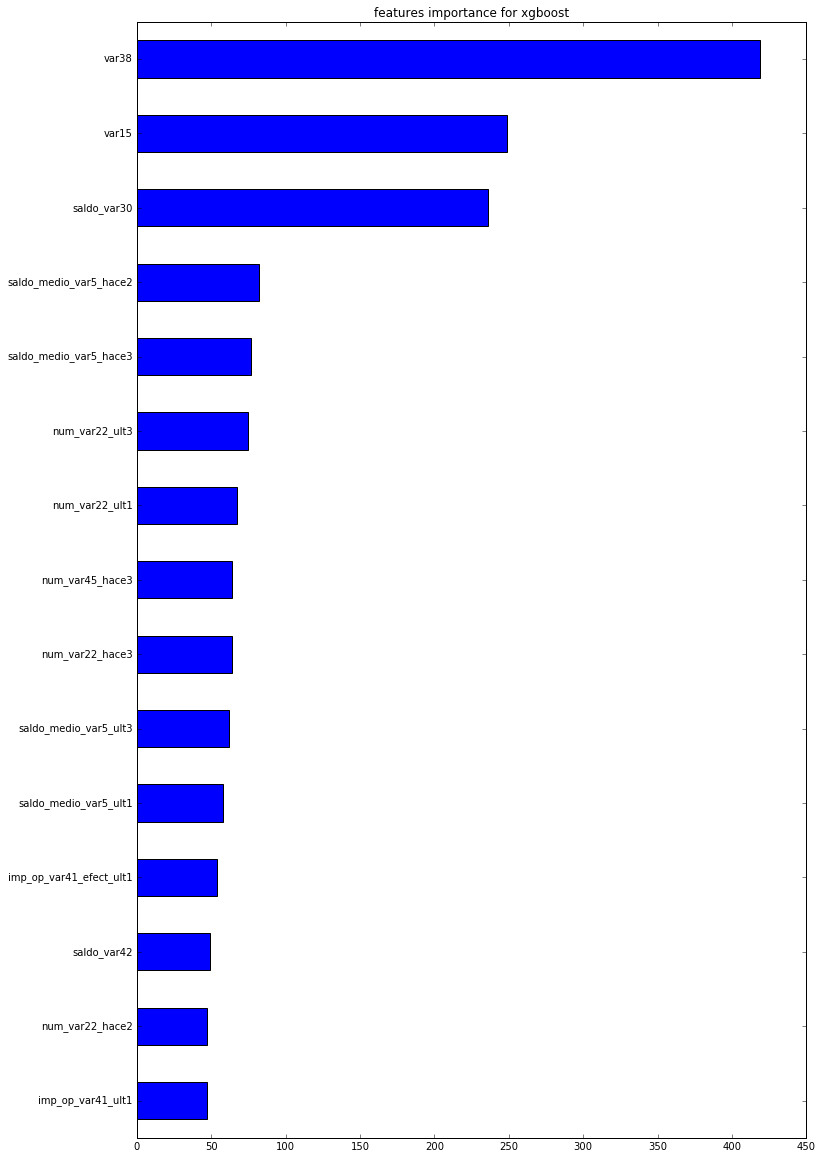

In [83]:
ts=pd.Series(xgb_model.booster().get_fscore())
# print ts
ts.sort_values()[-15:].plot(kind="barh", title=("features importance for xgboost"),figsize=(12, 20))

In [84]:
y_predict = xgb_model.predict_proba(test)

In [85]:
print y_predict

[[ 0.90243793  0.09756205]
 [ 0.8967253   0.1032747 ]
 [ 0.92666465  0.07333533]
 ..., 
 [ 0.92700058  0.0729994 ]
 [ 0.88735747  0.1126425 ]
 [ 0.92744762  0.07255239]]


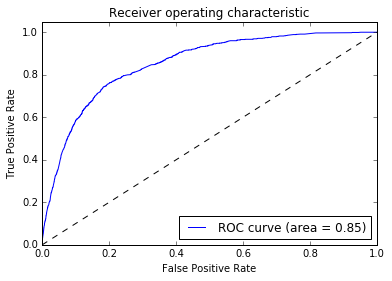

In [86]:
# plotAUC(x_test,y_test,xgb_model.predict_proba(test))
plotAUC(x_test,y_test,xgb_model.predict_proba(x_test))

In [128]:
tc=test
nv = tc['num_var33']+tc['saldo_medio_var33_ult3']+tc['saldo_medio_var44_hace2']+tc['saldo_medio_var44_hace3']+ tc['saldo_medio_var33_ult1']+tc['saldo_medio_var44_ult1']

y_predict[nv > 0] = np.array([0, 1])
y_predict[tc['var15'] < 23] =   np.array([0, 1])
y_predict[tc['saldo_medio_var5_hace2'] > 160000] =   np.array([0, 1])
y_predict[tc['saldo_var33'] > 0] =  np.array([0, 1])
y_predict[tc['var38'] > 3988596] = np.array([0, 1])
y_predict[tc['var21'] > 7500] =   np.array([0, 1])
y_predict[tc['num_var30'] > 9] =  np.array([0, 1])
y_predict[tc['num_var13_0'] > 6] =   np.array([0, 1])
y_predict[tc['num_var33_0'] > 0] =   np.array([0, 1])
y_predict[tc['imp_ent_var16_ult1'] > 51003] =   np.array([0, 1])
y_predict[tc['imp_op_var39_comer_ult3'] > 13184] =  np.array([0, 1])
y_predict[tc['saldo_medio_var5_ult3'] > 108251] =   np.array([0, 1])
y_predict[(tc['var15']+tc['num_var45_hace3']+tc['num_var45_ult3']+tc['var36']) <= 24] =   np.array([0, 1])
y_predict[tc['saldo_var5'] > 137615] =   np.array([0, 1])




/Public/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Public/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Public/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Public/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Public/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Public/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Public/anaconda/lib/python2.7/sit

In [129]:
print y_predict 

[[ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.92666489  0.07333513]
 ..., 
 [ 0.92700076  0.07299925]
 [ 0.88735849  0.11264154]
 [ 0.9274478   0.07255223]]


In [130]:
submission = pd.DataFrame({"ID":test.index,"TARGET":y_predict[:,1]})
submission.to_csv("submission.csv",index=False)

In [131]:
y_predict[nv > 0]

/Public/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

In [132]:
y_predict

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.92666489,  0.07333513],
       ..., 
       [ 0.92700076,  0.07299925],
       [ 0.88735849,  0.11264154],
       [ 0.9274478 ,  0.07255223]], dtype=float32)

Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

xgboost use cv to get parameters

In [87]:
import pandas as pd 
import numpy as np 
import xgboost as xgb 
import matplotlib.pylab as plt 
%matplotlib inline
from xgboost.sklearn import XGBClassifier

from sklearn import cross_validation, metrics #Additional scklearn functions 
from sklearn.grid_search import GridSearchCV #Perforing grid search
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 12, 4 

target = 'TARGET' 
IDcol = 'ID'

def modelfit (alg, dtrain, predictors, useTrainCV = True, cv_folds = 5, early_stopping_rounds = 50): 
	if useTrainCV: 
		xgb_param = alg.get_xgb_params ()
		xgtrain = xgb.DMatrix (dtrain [predictors].values, label = dtrain [target].values)
		cvresult = xgb.cv (xgb_param, xgtrain, num_boost_round = alg.get_params () ['n_estimators'], nfold = cv_folds, metrics = ["auc"], early_stopping_rounds = early_stopping_rounds, show_progress = True)
		alg.set_params (n_estimators = cvresult.shape [0])
	# Fit the algorithm on the data
	alg.fit (dtrain [predictors], dtrain [target], eval_metric = 'auc')
	# #Predict training set:
	
	dtrain_predictions = alg.predict (dtrain [predictors])
	dtrain_predprob = alg.predict_proba (dtrain [predictors]) [:, 1]
	# Print model report:
	print "\nModel Report"
	print "Accuracy : %.4g" % metrics.accuracy_score (dtrain [target].values, dtrain_predictions)
	print "AUC Score (Train): %f" % metrics.roc_auc_score (dtrain [target], dtrain_predprob)
	feat_imp = pd.Series (alg.booster ().get_fscore ()).sort_values (ascending = False)
	feat_imp.plot (kind = 'bar', title = 'Feature Importances')
	plt.ylabel ('Feature Importance Score')

In [88]:
predictors=train.iloc[:,:-1].columns

Will train until cv error hasn't decreased in 50 rounds.
[0]	cv-test-auc:0.7653892+0.0435841418977	cv-train-auc:0.7733554+0.0403142346801
[1]	cv-test-auc:0.7966078+0.0114347638262	cv-train-auc:0.8079226+0.00556790163706
[2]	cv-test-auc:0.800172+0.00537420903948	cv-train-auc:0.8131612+0.00749044258772
[3]	cv-test-auc:0.8070936+0.00697502179495	cv-train-auc:0.8203136+0.0108916860329
[4]	cv-test-auc:0.8145856+0.00536062006115	cv-train-auc:0.8286488+0.00674008710329
[5]	cv-test-auc:0.8166462+0.00853106369452	cv-train-auc:0.832753+0.00359736803789
[6]	cv-test-auc:0.8202308+0.00797195680871	cv-train-auc:0.8363722+0.00221091197473
[7]	cv-test-auc:0.8217732+0.00739220679906	cv-train-auc:0.838475+0.00249365418613
[8]	cv-test-auc:0.8228646+0.00720143798418	cv-train-auc:0.839361+0.00255761646851
[9]	cv-test-auc:0.8229734+0.00820047153766	cv-train-auc:0.839329+0.00304975717066
[10]	cv-test-auc:0.8239406+0.00659436233763	cv-train-auc:0.8413124+0.00214314559468
[11]	cv-test-auc:0.823829+0.0054149270


Model Report
Accuracy : 0.961
AUC Score (Train): 0.876629


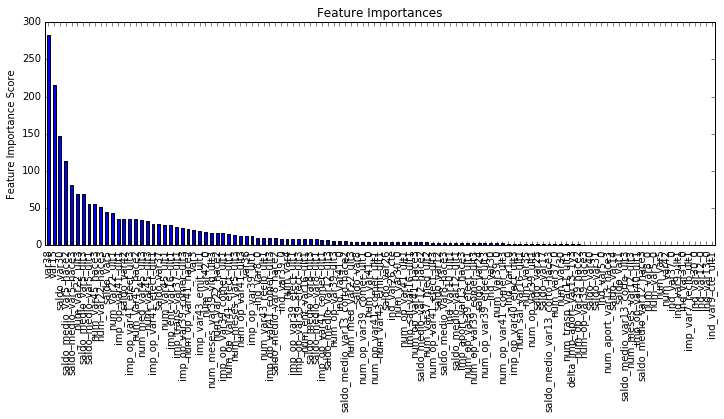

In [89]:
xgb1=XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
# print xgb1.get_xgb_parames()

modelfit(xgb1,train,predictors)

    we get best num of estimators : 80

In [90]:
xgb_best_n_estimators = 80

In [91]:
print train.columns
print train.iloc[:,:-1].columns

Index([u'var3', u'var15', u'imp_ent_var16_ult1', u'imp_op_var39_comer_ult1',
       u'imp_op_var39_comer_ult3', u'imp_op_var40_comer_ult1',
       u'imp_op_var40_comer_ult3', u'imp_op_var40_efect_ult1',
       u'imp_op_var40_efect_ult3', u'imp_op_var40_ult1',
       ...
       u'saldo_medio_var33_hace2', u'saldo_medio_var33_hace3',
       u'saldo_medio_var33_ult1', u'saldo_medio_var33_ult3',
       u'saldo_medio_var44_hace2', u'saldo_medio_var44_hace3',
       u'saldo_medio_var44_ult1', u'saldo_medio_var44_ult3', u'var38',
       u'TARGET'],
      dtype='object', length=307)
Index([u'var3', u'var15', u'imp_ent_var16_ult1', u'imp_op_var39_comer_ult1',
       u'imp_op_var39_comer_ult3', u'imp_op_var40_comer_ult1',
       u'imp_op_var40_comer_ult3', u'imp_op_var40_efect_ult1',
       u'imp_op_var40_efect_ult3', u'imp_op_var40_ult1',
       ...
       u'saldo_medio_var29_ult3', u'saldo_medio_var33_hace2',
       u'saldo_medio_var33_hace3', u'saldo_medio_var33_ult1',
       u'saldo_medio_va

In [92]:
param_test1 = {
'max_depth':range(3,10,2),
'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=xgb_best_n_estimators, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

In [ ]:
gsearch1.fit(train[predictors],train[target])

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

find best max_depth:5, min_child_weight:3

In [21]:
best_xgb_max_depth = 5
best_xgb_min_child_weight = 3

grid search in smaller range

In [65]:
param_test2 = { 'max_depth':[4,5,6], 'min_child_weight':[2,3,4] } 
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=xgb_best_n_estimators, max_depth=5, min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test2, scoring='roc_auc',n_jobs=1,iid=False, cv=5) 
gsearch2.fit(train[predictors],train[target]) 
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83837, std: 0.00901, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.83837, std: 0.00931, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.83831, std: 0.01000, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.83761, std: 0.00941, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: 0.83727, std: 0.00958, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.83759, std: 0.00946, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.83626, std: 0.01025, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: 0.83652, std: 0.00930, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.83664, std: 0.00959, params: {'max_depth': 6, 'min_child_weight': 4}],
 {'max_depth': 4, 'min_child_weight': 3},
 0.83837124786103934)

We find better parameters in smaller range: 'max_depth': 4, 'min_child_weight': 3

In [22]:
best_xgb_max_depth = 4
best_xgb_min_child_weight = 3

In [ ]:
tunning gamma

In [ ]:
param_test3= { 'gamma': [i/10.0 for i in range(0,5)]}
gsearch3 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_estimators=xgb_best_n_estimators,max_depth=best_xgb_max_depth,min_child_weight=best_xgb_min_child_weight,gamma=0,subsample= 0.8, colsample_bytree=0.8, objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27), param_grid=
param_test3,scoring = 'roc_auc',n_jobs=1,iid=False,cv=5                )
gsearch3.fit(train[predictors],train[target]) 
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [25]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83932, std: 0.00929, params: {'gamma': 0.0},
  mean: 0.83915, std: 0.00895, params: {'gamma': 0.1},
  mean: 0.83922, std: 0.00882, params: {'gamma': 0.2},
  mean: 0.83912, std: 0.00894, params: {'gamma': 0.3},
  mean: 0.83885, std: 0.00919, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.83932151180304582)

best gamma: 0

In [23]:
xgb_best_gamma=0

In [ ]:
param_test4 = { 'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)] } 
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=xgb_best_n_estimators, max_depth=best_xgb_max_depth, min_child_weight=best_xgb_min_child_weight, gamma=xgb_best_gamma, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 
gsearch4.fit(train[predictors],train[target]) 
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
param_test5 = {
'subsample':[i/100.0 for i in range(75,90,5)],
'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=xgb_best_n_estimators, max_depth=best_xgb_max_depth,
min_child_weight=best_xgb_min_child_weight, gamma=xgb_best_gamma, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

find best regularization alpha

In [26]:
param_test6 = { 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100] } 
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=xgb_best_n_estimators, max_depth=best_xgb_max_depth, min_child_weight=best_xgb_min_child_weight, gamma=xgb_best_gamma, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 
gsearch6.fit(train[predictors],train[target]) 
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.83932, std: 0.00929, params: {'reg_alpha': 1e-05},
  mean: 0.83931, std: 0.00912, params: {'reg_alpha': 0.01},
  mean: 0.83949, std: 0.00956, params: {'reg_alpha': 0.1},
  mean: 0.83959, std: 0.00935, params: {'reg_alpha': 1},
  mean: 0.82809, std: 0.00892, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.83958566172506066)

    find best alpha=1

In [27]:
xgb_best_alpha=1

In [23]:
xg.cv

<function xgboost.training.cv>

cross validation

In [35]:
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV

## Ensemble
run as many models as possbile, then use existing ensemble code 

### SVM
need sub sample 

In [ ]:
import seaborn
import pylab as pl
from scipy import stats
seaborn.set()

/Public/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [ ]:
from sklearn.svm import SVC
# SVM is slow, use subsample
clf = SVC()
clf.fit(x,y)

In [ ]:
clf.predict_proba(test)

### Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [34]:
clf = RandomForestClassifier(n_estimators=10,max_depth=None,min_samples_split=1,random_state=0)

In [35]:
clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
clf.predict(test)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
clf.predict_proba(test)

array([[ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ]])

### Neural networks

### Decision tree

In [17]:
from sklearn import tree
clf= tree.DecisionTreeClassifier(max_features=50,max_depth=10);
clf=clf.fit(x_train,y_train)

In [18]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
clf.predict_proba(x_test)

array([[ 0.98429752,  0.01570248],
       [ 0.86592179,  0.13407821],
       [ 0.98443552,  0.01556448],
       ..., 
       [ 0.98443552,  0.01556448],
       [ 0.9860262 ,  0.0139738 ],
       [ 0.98533586,  0.01466414]])

In [20]:
clf.feature_importances_

array([  3.37652108e-03,   2.23162804e-01,   7.16859896e-04,
         5.45267591e-03,   6.75163737e-03,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.86018704e-04,   0.00000000e+00,   1.91485127e-03,
         1.18743997e-02,   8.18982174e-03,   2.40492443e-02,
         5.23061610e-03,   7.78813460e-04,   1.70175905e-02,
         3.19141879e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.35098973e-03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [22]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf,prefit=True)
x_new = model.transform(x)
x_new.shape

(76020, 50)

In [ ]:
from sklearn.metrics import roc_auc_score, auc
# print len(clf.predict_proba(x_test))
# auc(y_test,clf.predict_proba(x_test)[:,1])

#### cross validation

- - -
objective function:

$$Obj(\Theta) = L(\Theta) + \Omega(\Theta)$$
$$\min_{w,b,\eta} \frac{1}{2}w^Tw+C\sum^n_{i=1}\eta_i$$

#### training curve
• The Training Score shows how well a model fits the data it was trained on. This is not a good indication of model effectiveness

• The Validation Score shows how well a model fits hold-out data. The most effective method is some form of cross-validation, where multiple hold-out sets are used.

• Validation Curves are a plot of validation score and training score as a function of model complexity:

• when the two curves are close, it indicates underfitting

• when the two curves are separated, it indicates overfitting

• the "sweet spot" is in the middle

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve

def plot_validation_curve(estimator, title, X, y, ylim=None, cv=None,param_name="gamma",scoring="accuracy",
                        n_jobs=1, param_range = np.logspace(-6, -1, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Model complexity")
    plt.ylabel("Score")
    
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    return plt


In [ ]:
from xgboost.sklearn import XGBClassifier
title="Validation curve with XGBoost"
cv = cross_validation.ShuffleSplit(x.shape[0],n_iter=100,test_size=0.2,random_state=0)
estimator1 =  XGBClassifier( n_estimators=xgb_best_n_estimators, max_depth = best_xgb_max_depth , min_child_weight = best_xgb_min_child_weight, reg_alpha=xgb_best_alpha)

# print estimator1
plot_validation_curve(estimator1,title,x,y,ylim=(0.7,1.01),cv=cv,n_jobs=4)
plt.show()

#### learning curve


• Learning Curves are a plot of the validation score and training score as a function of Number of training samples

• when the curves are close, it indicates underfitting, and adding more data will not generally improve the estimator.

• when the curves are far apart, it indicates overfitting, and adding more data may increase the effectiveness of the model.



In [ ]:
print len(y_test)
# print y_test
print len(clf.predict_proba(x_test))
print clf.predict_proba(x_test)

In [ ]:
plotAUC(x_test,y_test,clf.predict_proba(x_test))

In [29]:
from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
from xgboost.sklearn import XGBClassifier
title="Learning curve with XGBoost"
cv = cross_validation.ShuffleSplit(x.shape[0],n_iter=100,test_size=0.2,random_state=0)
estimator1 =  XGBClassifier( n_estimators=xgb_best_n_estimators, max_depth = best_xgb_max_depth , min_child_weight = best_xgb_min_child_weight, reg_alpha=xgb_best_alpha)

# from sklearn.svm import SVC
# estimator1 = SVC(gamma=0.001)

# print estimator1
plot_learning_curve(estimator1,title,x,y,ylim=(0.7,1.01),cv=cv,n_jobs=4)
plt.show()

#### gradient boost classifier ensemble

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

## Combination of ensembles

preprocessing before submission

# Under 23 year olds are always happy

 preds[var15 < 23] = 0
 
 preds[saldo_medio_var5_hace2 > 160000]=0
 
 preds[saldo_var33 > 0]=0
 
 preds[var38 > 3988596]=0
 
 preds[V21>7500]=0
 
 preds[nv > 0] = 0
 
preds[tc['num_var30'] > 9] = 0

preds[tc['num_var13_0'] > 6] = 0

preds[tc['num_var33_0'] > 0] = 0

preds[tc['imp_ent_var16_ult1'] > 51003] = 0

preds[tc['imp_op_var39_comer_ult3'] > 13184] = 0

preds[tc['saldo_medio_var5_ult3'] > 108251] = 0

preds[(tc['var15']+tc['num_var45_hace3']+tc['num_var45_ult3']+tc['var36']) <= 24] = 0

preds[tc['saldo_var5'] > 137615] = 0

 